<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/Regression_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is the main difference between regression and classification?
If you look at the classifier examples shared earlier, you will find that regression models predict a continuous variable as opposed to a class. So, in classifiers, we "classify" things so that they are in different classes. We first used a logsitic regression to [classify students](https://github.com/tawfiqam/MI564/blob/main/Logistic_Regression_Classifier_Intro.ipynb) accepted (class 1) to a program and those who are not (class 2). We used a random forest classifier to [differentiate different types of wine](https://github.com/tawfiqam/MI564/blob/main/Random_Forest_Intro.ipynb). We also used a Naive Bayes classifier to [classify posts to two different online communities](https://github.com/tawfiqam/MI564/blob/main/Naive_Bayes_Intro.ipynb).

With regression, we will predict a value. As I laid out before, this value represents a continous variable. A continous variable can take on an uncountable set of values. So while classifiers used discrete variables (basically integers - [0,1,2,3]), regression gets us a predicted continous variable - usually including a fraction [0,0.345,100.45].

##Regression Evaluation Metrics

Remember that we used evaluation metrics for classifiers including accuracy, precision, recall, F1 score, and ROC curves when working with classifiers. But these will not work here because, again, we are not classifying into discrete groups, but predicting specific numbers. 

There are two metrics used to evaluate regression models:

R-squared: R-squared values range between 0 and 1. They are commonly stated as percentages. It is a statistical measure that represents the proportion of the variance for a target variable that is explained by the independent variables. The higher the R-squared the better the model.

Root Mean Squared Error (RMSE): measures the average magnitude of the residuals or error. What is the error? This is the difference between our prediction and the actual value. 

Ideally, lower RMSE and higher R-squared values are indicative of a good model. 



In [1]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5   ...  8      9     10      11    12    13
0  0.00632  18.0  2.31   0  0.538  6.575  ...   1  296.0  15.3  396.90  4.98  24.0
1  0.02731   0.0  7.07   0  0.469  6.421  ...   2  242.0  17.8  396.90  9.14  21.6
2  0.02729   0.0  7.07   0  0.469  7.185  ...   2  242.0  17.8  392.83  4.03  34.7
3  0.03237   0.0  2.18   0  0.458  6.998  ...   3  222.0  18.7  394.63  2.94  33.4
4  0.06905   0.0  2.18   0  0.458  7.147  ...   3  222.0  18.7  396.90  5.33  36.2

[5 rows x 14 columns]


In [1]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)

We are going to use the Boston Housing Data in our analysis

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

In [80]:
import numpy as np
import pandas as pd


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20,'figure.figsize':(15,12)})

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'

df = pd.read_csv(url, header=None)

In [81]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [82]:
data = df[df.columns[0:12]]
target = df[df.columns[13]]

In [44]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040612,0.113636,0.401470,0.069170,0.636849,0.715790,0.685749,0.312954,0.397892,0.574173,0.838888,0.898650
std,0.096672,0.233225,0.247309,0.253994,0.133040,0.080025,0.281489,0.173645,0.362802,0.237042,0.098407,0.230020
min,0.000071,0.000000,0.016583,0.000000,0.442021,0.405581,0.029000,0.093151,0.041667,0.263010,0.572727,0.000806
25%,0.000922,0.000000,0.187094,0.000000,0.515499,0.670330,0.450250,0.173189,0.166667,0.392405,0.790909,0.945773
50%,0.002883,0.000000,0.349315,0.000000,0.617681,0.707118,0.775000,0.264499,0.208333,0.464135,0.865909,0.986243
75%,0.041327,0.125000,0.652487,0.000000,0.716418,0.754385,0.940750,0.427858,1.000000,0.936709,0.918182,0.998299
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
target[0:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: 13, dtype: float64

In [126]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)

In [127]:
X_train[0:2]

,0,1,2,3,4,5,6,7,8,9,10,11
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437.0,21.2,396.90
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223.0,18.6,394.96


In [128]:
y_train[0:5]

141    14.4
272    24.4
135    18.1
298    22.5
122    20.5
Name: 13, dtype: float64

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [130]:
X_train[0:2]

array([[-0.20735619, -0.49997924,  1.54801583, -0.26360274,  0.58821309,
        -1.83936729,  1.10740225, -1.1251102 , -0.61816013,  0.20673466,
         1.2272573 ,  0.42454294],
       [-0.38886492,  0.34677427, -0.58974728, -0.26360274, -0.79782145,
         0.32748658, -0.36766106,  0.07509   , -0.73363701, -1.04949303,
         0.05696346,  0.40185312]])

In [131]:
# create target scaler object
target_scaler = StandardScaler()
target_scaler.fit(y_train.to_numpy().reshape(-1,1))
y_train = target_scaler.transform(y_train.to_numpy().reshape(-1,1))
y_test = target_scaler.transform(y_test.to_numpy().reshape(-1,1))

In [132]:
y_train[0:5]

array([[-0.90645092],
       [ 0.17970697],
       [-0.5045725 ],
       [-0.02666303],
       [-0.24389461]])

In [133]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

y_pred = model.predict(X_test) 

print(np.sqrt(mean_squared_error(y_test,y_pred))) 
print(r2_score(y_test, y_pred))

0.6465262120165035
0.5744787579615156


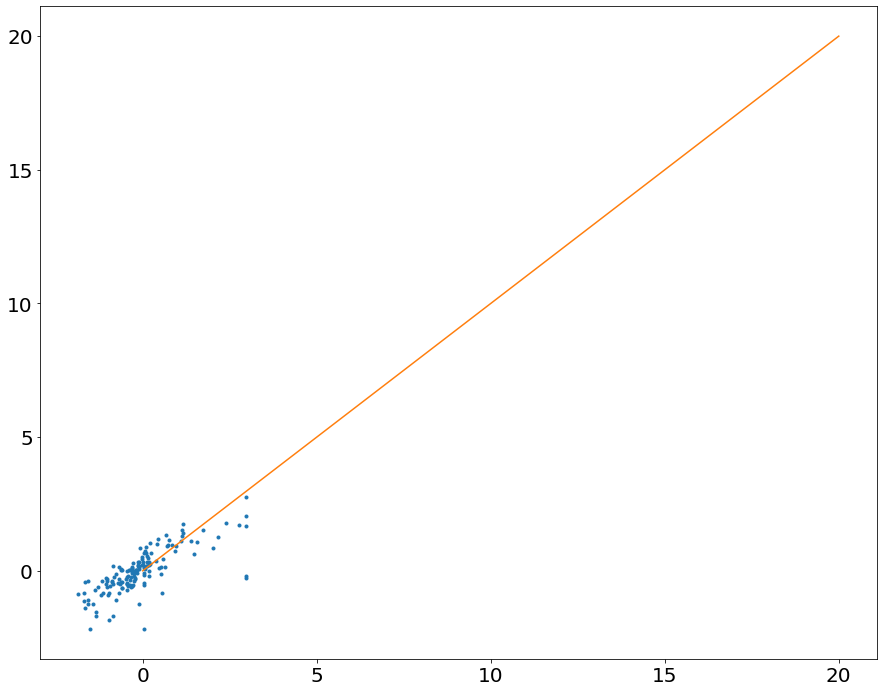

In [136]:
# plot prediction and actual data
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y)
plt.show()

In [137]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = Ridge()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

y_pred = model.predict(X_test) 

print(np.sqrt(mean_squared_error(y_test,y_pred))) 
print(r2_score(y_test, y_pred))

0.6468759790407583
0.5740182242513445


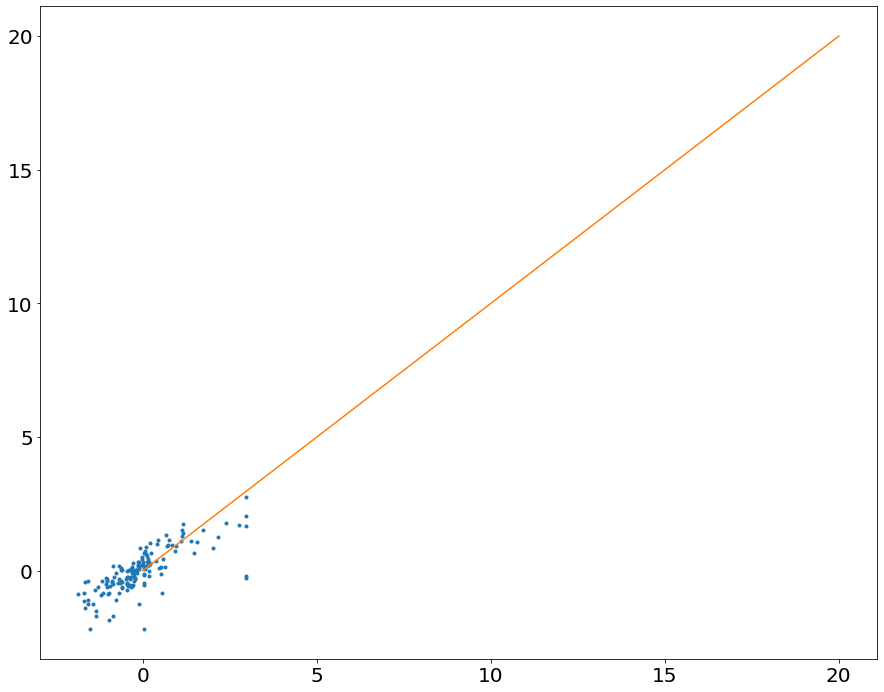

In [138]:
# plot prediction and actual data
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y)
plt.show()

In [139]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = Lasso()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

y_pred = model.predict(X_test) 

print(np.sqrt(mean_squared_error(y_test,y_pred))) 
print(r2_score(y_test, y_pred))

0.994097002178065
-0.006019731947687124


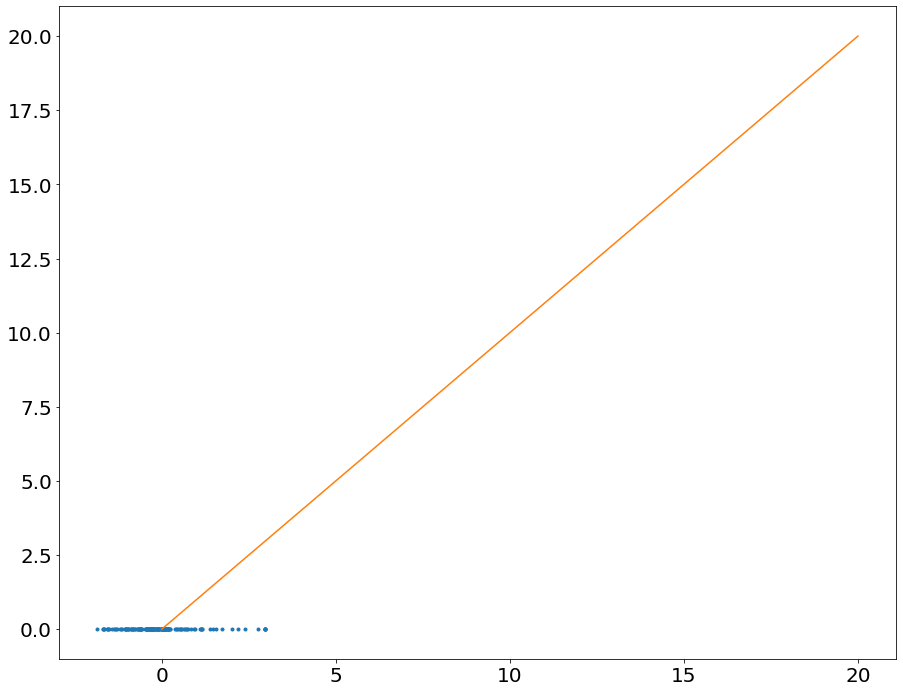

In [141]:
# plot prediction and actual data
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y)
plt.show()

In [142]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = DecisionTreeRegressor()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

y_pred = model.predict(X_test) 

print(np.sqrt(mean_squared_error(y_test,y_pred))) 
print(r2_score(y_test, y_pred))

0.8054748204136073
0.33953028542476427


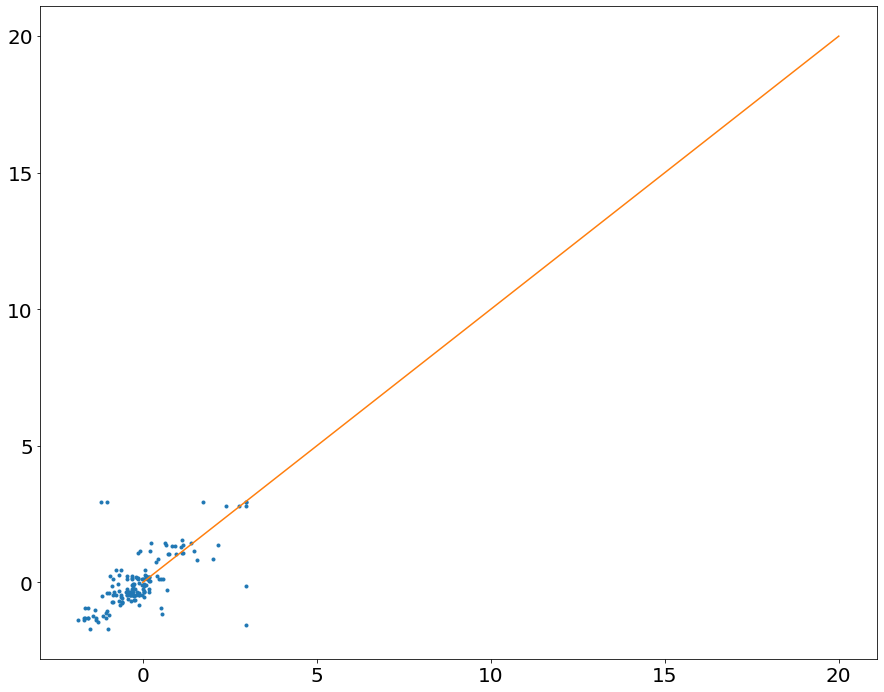

In [143]:
# plot prediction and actual data
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y)
plt.show()

In [94]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = RandomForestRegressor()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

y_pred = model.predict(X_test) 

print(np.sqrt(mean_squared_error(y_test,y_pred))) 
print(r2_score(y_test, y_pred))

5.383630659596492
0.6519149166648972


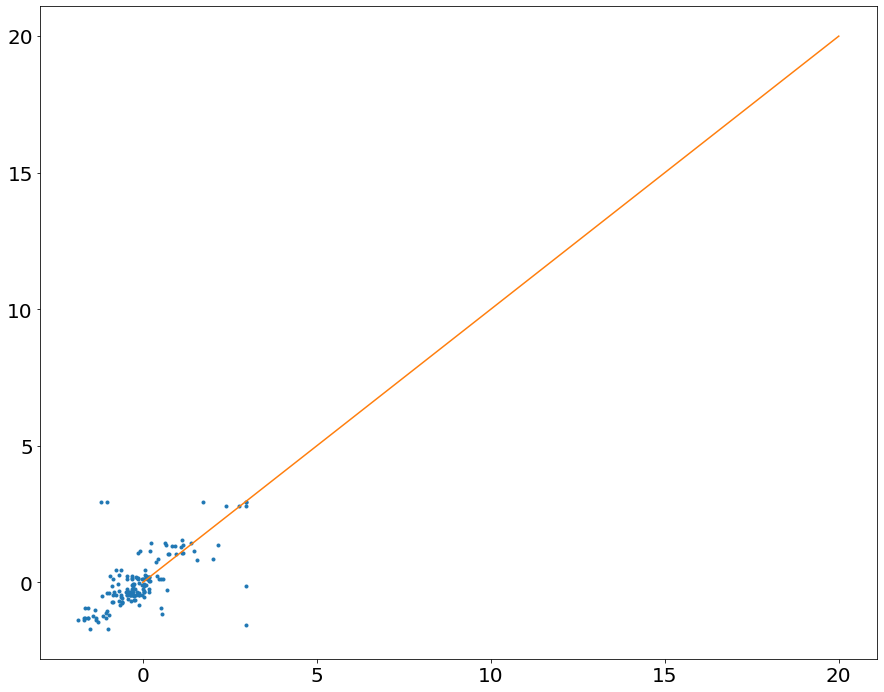

In [145]:
# plot prediction and actual data
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y)
plt.show()

In [146]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = SVR(kernel='rbf')
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

y_pred = model.predict(X_test) 

print(np.sqrt(mean_squared_error(y_test,y_pred))) 
print(r2_score(y_test, y_pred))

0.5688504475153567
0.6705836286893923


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


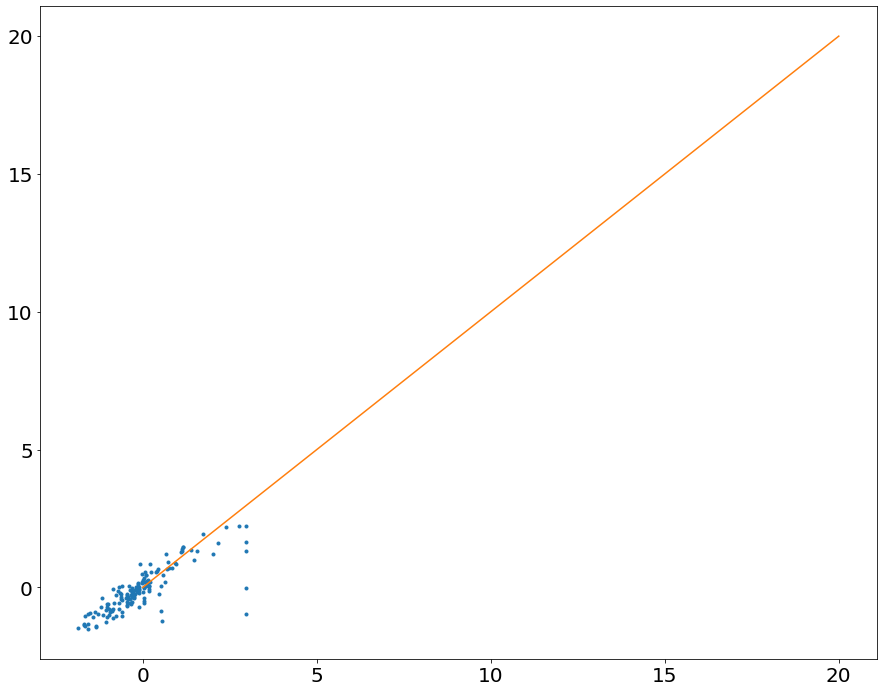

In [148]:
# plot prediction and actual data
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y)
plt.show()